<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Lucas Orellana Jara
- Nombre de alumno 2: Elizabeth Ramírez Zamorano


### **Link de repositorio de GitHub Lucas:** [Repositorio](https://github.com/ElLuquitas/MDS7202-labs.git)

### **Link de repositorio de GitHub Elizabeth:** [Repositorio](https://github.com/ElizabethVRZ/MDS7202_1_Laboratorio_Programacion)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

>
**Respuesta 1:**
`Apache Spark` es un framework que nos permite poder trabajar con grandes volúmenes de datos. Tiene la gracia de que unifica dentro de una misma plataforma módulos para trabajar con SQL, streaming de datos, machine learning y procesamiento de grafos. Sus principales ventajas sobre `Pandas` tienen que ver con el manejo de grandes volúmenes de datos y la velocidad con la que lo hace. Por un lado, `Pandas` usa una evaluación de tipo Eager y es incapaz de tener procesos paralelos (computación distribuida) para trabajar con los datos. En cambio, `Apache PySpark` tiene una evaluación tipo Lazy y soporta diversos procesos paralelos, lo que le da velocidad al trabajo.

**Respuesta 2:**
**RDD** se refiere a *Resilient Distributed Dataset*, una estructura fundamental de los datos en Spark. Los **RDD** pueden estar conformados por diferentes tipos de objetos, ya sean por ejemplo de Python o definidas por el propio usuario. La ventaja de esta estructura es que permite particionar estos elementos, dando cabida a computación paralela. Si usamos un *dataset*, la ventaja es que se pueden hacer operaciones de manera particionada, optimizando los tiempos de trabajo.

**Respuesta 3:**
Una **transformación** corresponde a manipulaciones que se realizan sobre un *dataset*, creando una copia del mismo sin afectar el original y sin llegar a ejecutarse en el momento, mientras que la **acción** es la operación que ejecuta las transformaciones acumuladas hasta ese momento. Por ejemplo, una **transformación** puede ser `orderBy()` y la acción `show()`. Internamente, al ejecutar una **acción** se generan una serie de acciones que van desde la creación del DAG específico para las transformaciones hasta la repartición de tareas para ejecutar cada transformación.

**Respuesta 4:**
La importancia del **particionamiento** en Spark es util para optimizar el rendimiento del procesamiento de datos. Lo que hace Spark es que divide los datos en pequeñas partes llamadas particiones, que se distribuyen entre los diferentes nodos del clúster para su procesamiento en paralelo. Esto genera una mayor eficiencia y escalabilidad al aprovechar el poder de cómputo distribuido.
Al dividir los datos en particiones, Spark puede procesar múltiples tareas simultáneamente (paralelismo), reduciendo el tiempo total de ejecución.

El particionamiento afecta el rendimiento al permitir un mayor paralelismo, equilibrar la carga entre nodos y reducir el costo de lectura y escritura de ellos. Un buen particionamiento minimiza la sobrecarga de administración y la transferencia de datos entre nodos, optimizando el uso de recursos y acelerando el procesamiento. Igualmente hay que hacer un particionamiento eficiente, por ejemplo, un particionamiento excesivo puede dificultar el procesamiento, por ello hay que buscar un equilibrio.

**Respuesta 5:**
El `Spark Driver` coordina todo el proceso de ejecución: planifica, distribuye y supervisa las tareas en el clúster. Define el DAG (grafo acíclico dirigido) de las operaciones y asigna las tareas a los `Spark Executor` , que son los encargados de ejecutar las tareas en los nodos del clúster, gestionando el procesamiento de datos y almacenando los resultados en memoria o disco.
En palabras sencillas y tal como sus nombres, el Driver Spark conduce/coordina/organiza el funcionamiento de las tareas, mientras que Spark Executors las hace/ejecuta en cada nodo.

**Respuesta 6:**

El `Catalyst Optimizer`  en Apache Spark es el componente encargado de optimizar las consultas SQL ejecutadas en Spark. Su función principal es generar el plan de ejecución más eficiente posible, transformando el código SQL en un DAG (grafo acíclico dirigido) optimizado. Lo hace a través de un conjunto de reglas que simplifican, reorganizan y mejoran las consultas, reduciendo la cantidad de datos procesados y el tiempo de ejecución. En resumen, Catalyst mejora el rendimiento de las consultas SQL mediante la optimización lógica y física del plan de ejecución.

## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=33de86085921b12d391676c8ffca66b017660041edcc78cbcddcbd189b09c7e7
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [3]:
# Descargar los datos
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

--2024-09-13 00:48:53--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79022616 (75M) [application/octet-stream]
Saving to: ‘datos_lab_spark.parquet’

datos_lab_spark.par 100%[===================>]  75.36M   169MB/s    in 0.4s    

2024-09-13 00:48:53 (169 MB/s) - ‘datos_lab_spark.parquet’ saved [79022616/79022616]



In [4]:
# Iniciar una sesión de PySpark
sparksession = SparkSession.builder.master("local").appName("Primera Actividad").getOrCreate()

# Cargar el dataset en una variable
df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")
    )

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [5]:
# 1. Revisar la estructura de los datos
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [6]:
# 2. Mostrar las primeras 10 filas del dataset
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [7]:
# 3. Muestreo aleatorio del 5% de las observaciones
df.sample(fraction = 0.05, seed = 11).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|     Amandaborough|       NULL| 212.195.49.198|U

In [8]:
# 4. Tipo de datos de cada columna
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

**Disclaimer**: El tipo de clases de las variables se pudo obtener de la [página oficial](https://spark.apache.org/docs/latest/sql-ref-datatypes.html) de Spark.

Hay diferentes columnas que presentan, en general, deficiencia en el tipo de variable usada, principalmente por el almacenamiento excesivo e innecesario. Específicamente:

* `Transaction Date`: se presenta como tipo `TimestampNTZType`, el cual muestra fecha y hora sin huso horario. Al no existir hora exacta asociada a la transacción y una columna dedicada a la hora (`Transaction Hour`), esta columna puede ser de un tipo que sólo indique la fecha, tal como puede ser `DateType`.

* `Quantity`: se presenta como tipo `double`, el que es útil cuando se está trabajando con números muy grandes o muy pequeños del orden de $\pm 1.8 \cdot 10^{308}$. Al representar cantidades de compra, es más útil usar el tipo `ByteType` si sólo son compras menores a $127$ productos, además de que no existe "medio" producto.

* `Customer Age`: se presenta como tipo `double` cuando las edades siempre son enteros positivos y generalmente menores a $100$ (aunque en edad alien no se sepa aún), por lo que se prefiere el uso del tipo `ByteType`.

* `Account Age Days`: se presenta como tipo `double` cuando la cantidad de días se están contando como enteros. Un tipo más acorde a esta columna sería `ShortType`.

* `Transaction Hour`: se presenta como tipo `double` y tiene valores entre $0$ y $23$, por lo que basta con que sea del tipo `ByteType`.

Hay otra columna que sí presenta un tipo que no debe ser. `Is An Alien` se presenta como tipo `double`, cuando en la descripción se clasifica como un indicador binario. Aún así, el tipo que mejor se acomoda a esta columna es `BooleanType` al clasificar a un comprador como alien o no.

In [9]:
# 5. Cambiar los tipos de las columnas descritas anteriormente
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, col_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(col_type))
    return df

In [10]:
from pyspark.sql.types import DateType, ByteType, ShortType, BooleanType

new_types = {
    "Transaction Date": DateType(),
    "Quantity": ByteType(),
    "Customer Age": ByteType(),
    "Account Age Days": ShortType(),
    "Transaction Hour": ByteType(),
    "Is An Alien": BooleanType()
}

df = cast_columns(df, new_types)

In [11]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: date (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: byte (nullable = true)
 |-- Customer Age: byte (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: boolean (nullable = true)
 |-- Account Age Days: short (nullable = true)
 |-- Transaction Hour: byte (nullable = true)



In [12]:
df.show(10)

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|      2022-03-24| bank transfer|     electronics|       1|          17|    Amandaborough|       NULL| 212.195.49.198|Unit 8934 Box 005

In [13]:
# 6. Contar la cantidad de nulos por cada variable
from pyspark.sql.functions import when, col, sum

nulls = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]
df.agg(*nulls).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [14]:
# 7. Eliminar los datos nulos
df = df.na.drop()

In [15]:
# 8. Eliminar los datos duplicados
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [16]:
# 1. Creación de columna "Transaction bp" según la fórmula: log(48 + abs(x^(36)))
from pyspark.sql.functions import log, abs

df = df.withColumn("Transaction bp", log(48 + abs(df["Transaction Amount"] ** 36)))

In [17]:
# 2. Creación de columna "Transaction Month" para obtener el mes de transacción
from pyspark.sql.functions import month

df = df.withColumn("Transaction Month", month(df["Transaction Date"]))

In [18]:
# 3. Creación de columna "Type of purchase" según la cantidad de unidades vendidas
# "minorista": 4 productos o menos
# "mayorista": 5 productos o más

df = df.withColumn("Type of purchase", when(df["Quantity"] <= 4, "minorista").otherwise("mayorista"))

In [19]:
# 4. Mostrar los registros de compras hechos por aliens
df.filter(df["Is An Alien"] == True).show()

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|c1b1f701-a678-4de...|b7fefc31-

In [20]:
# 5. Obtener los totales de compras hechas por humanos y por alienigenas
from pyspark.sql.functions import count

df.groupBy("Is An Alien").agg(count("*").alias("Total de compras")).show()

+-----------+----------------+
|Is An Alien|Total de compras|
+-----------+----------------+
|       true|             688|
|      false|           12700|
+-----------+----------------+



In [21]:
# 6. Mostrar recaudación promedio por transacción por cada método de pago, tanto
# para humanos como alienígenas
df.groupBy("Payment Method").pivot("Is An Alien").mean("Transaction Amount").show()

+--------------+------------------+------------------+
|Payment Method|             false|              true|
+--------------+------------------+------------------+
|    debit card|215.21641883519146| 547.1965168539326|
| bank transfer|215.15149230285866| 547.6004624277458|
|        PayPal|215.12598584754002|469.51776470588237|
|   credit card|206.31122327043983| 517.7530538922158|
+--------------+------------------+------------------+



In [22]:
# sparksession.stop()

### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [23]:
# Conversión a formato Pandas
df_pandas = df.toPandas()

In [24]:
# Identificar columnas numéricas
numeric_columns = df_pandas.select_dtypes(include=['number']).columns

# Identificar columnas categóricas (objetos o strings)
categorical_columns = df_pandas.select_dtypes(include=['object']).columns

# Mostrar los resultados
print("Columnas numéricas:", numeric_columns)
print("Columnas categóricas:", categorical_columns)

Columnas numéricas: Index(['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days',
       'Transaction Hour', 'Transaction bp', 'Transaction Month'],
      dtype='object')
Columnas categóricas: Index(['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method',
       'Product Category', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Type of purchase'],
      dtype='object')


#### Variables Categóricas

Se uso la función px. histogram en vez de usar px. bar porque como la columnas Is An Alien es True o False, el gráfico no sale del todo bien (se ve con un filtro blanco encima). Como opción, se uso px. histogram que no presenta ese problema. Como las instruccciones dicen "Evite realizar transformaciones adicionales con pandas", se opto por usar px.histogram.

In [25]:
# Gráfico 1: payment_method vs is_alien
fig1 = px.histogram(df_pandas, x='Is An Alien', color='Payment Method', barmode='group', title='Método de Pago vs. Alien y Humanos')
fig1.show()
fig2 = px.histogram(df_pandas, x='Is An Alien', color='Device Used', barmode='group', title='Dispositivo usado vs. Alien y Humanos')
fig2.show()
fig3 = px.histogram(df_pandas, x='Is An Alien', color='Type of purchase', barmode='group', title='Tipo de compra vs. Alien y Humanos')
fig3.show()

Basandose en los tres gráficos anteriores, se puede mencionar lo siguiente:
1. En el gráfico de Método de pago diferenciado en Aliens y Humanos se observa que la cantidad en cada método de pago es bastante similar en ambos grupos (Aliens y Humanos). Si se mira en detalle, se observa que la tarjeta de débito tiene una leve ventaja en ambos grupos. En el grupo de Humanos, el medio con menos pago es Paypal y en Aliens es la tarjeta de crédito. Pero es importante señalar que los 4 métodos de pagos se usaran bastante similar en cantidad en ambos grupos analizados.

2. En el gráfico de dispositivo usado vs Humanos y Aliens se observa que en Humanos se usa levemente más la Tablet y en el grupo de Aliens el pc de escritorio. Sin embargo, al igual que el gráfico anterior, los tres medios usados para comprar se usan en cantidad similares en cada grupo.

3. En el gráfico de tipo de comprar vs Humanos y Aliens se observa que en ambos grupos, la compra con mayores frecuencia es la minorista. Si se analiza en detalle,


Finalmente, quisieramos mencionar que no es tan sencillo comparar Humanos y Aliens, ya que la cantidad total de Aliens es menor (688) mientras que los Humanos son casi el doble (12700). Por ello, generamos una opción en porcentajes relativos a cada grupo, para que la comparación sea más justa. Lo adjuntamos a continuación.  




#### Variables Numéricas

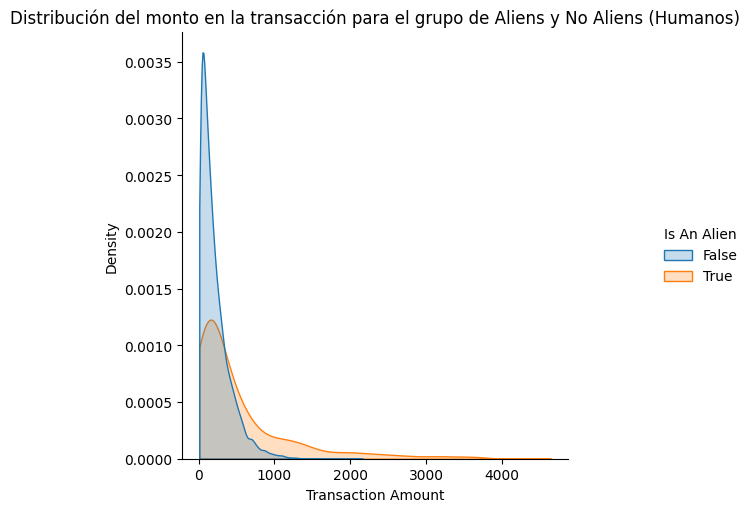

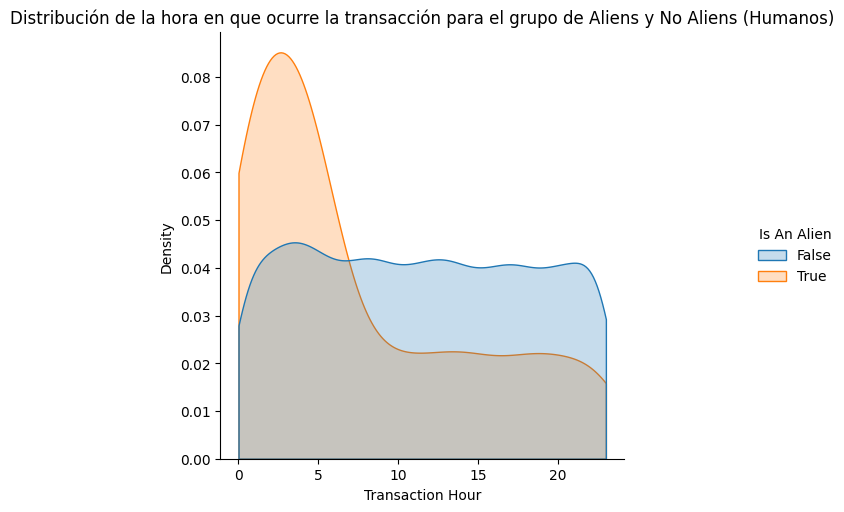

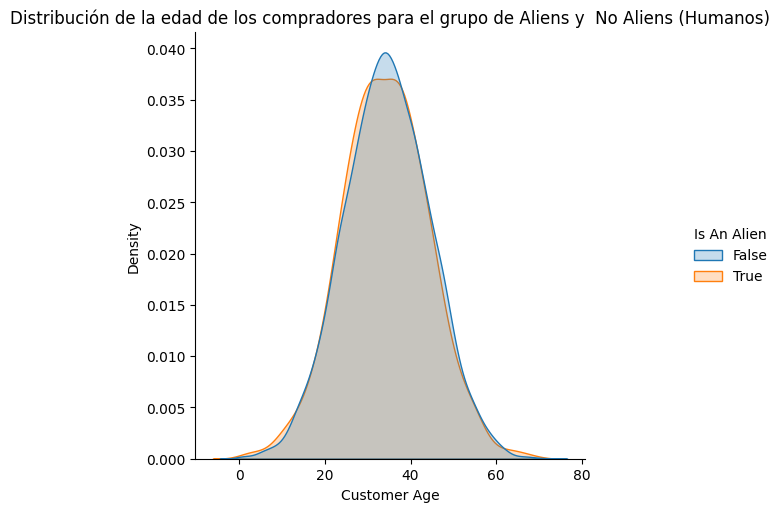

In [26]:
#Para graficar se usará la libreria seaborn

import seaborn as sns

# Gráfico 1: Distribución de 'Transaction Amount' con KDE diferenciada por 'Is An Alien'
sns.displot(
    data=df_pandas,
    x='Transaction Amount',
    hue='Is An Alien',
    kind='kde',
    fill=True,
    common_norm=False,
    clip=(10.0, 4638.55)  # Limitar el rango de valores al mínimo y máximo
)
plt.title('Distribución del monto en la transacción para el grupo de Aliens y No Aliens (Humanos)')
plt.show()

# Gráfico 2: Distribución de 'Quantity' con KDE diferenciada por 'Is An Alien'
sns.displot(
    data=df_pandas,
    x='Transaction Hour',
    hue='Is An Alien',
    kind='kde',
    fill=True,
    common_norm=False,
    clip=(0, 23)  # Limitar la estimación KDE entre 0 y 23
)
plt.title('Distribución de la hora en que ocurre la transacción para el grupo de Aliens y No Aliens (Humanos)')
plt.show()

# Gráfico 3: Distribución de 'Customer Age' con KDE diferenciada por 'Is An Alien'
sns.displot(data=df_pandas, x='Customer Age', hue='Is An Alien', kind='kde', fill=True, common_norm=False)
plt.title('Distribución de la edad de los compradores para el grupo de Aliens y  No Aliens (Humanos)')
plt.show()

Con respecto a los gráficos anteriores, se puede observar lo siguiente:
1. En la distribución del monto de la transacción, se ve que Humanos tienen un peak más alto que Aliens y sus valores estan aproximadamente entre 0 a 1000, mientras que Aliens tienen un peak más bajo pero abarcan un rango mayor, hasta sobre los 4000. La distribución de ambos se asemeja a la distribución Gamma.
2. En la distribución de la hora de la transacción, se ve que las distribuciones son diferentes. Los Humanos compran de forma similar a diferentes horas del dia, mientras que los Aliens compran más entre 0 a 5 horas.
3. La distribución de la edad de los compradores en el grupo de Humanos y Aliens es similar. La distribución se asemeja a una distribución normal.



#### Patrones en Transacciones

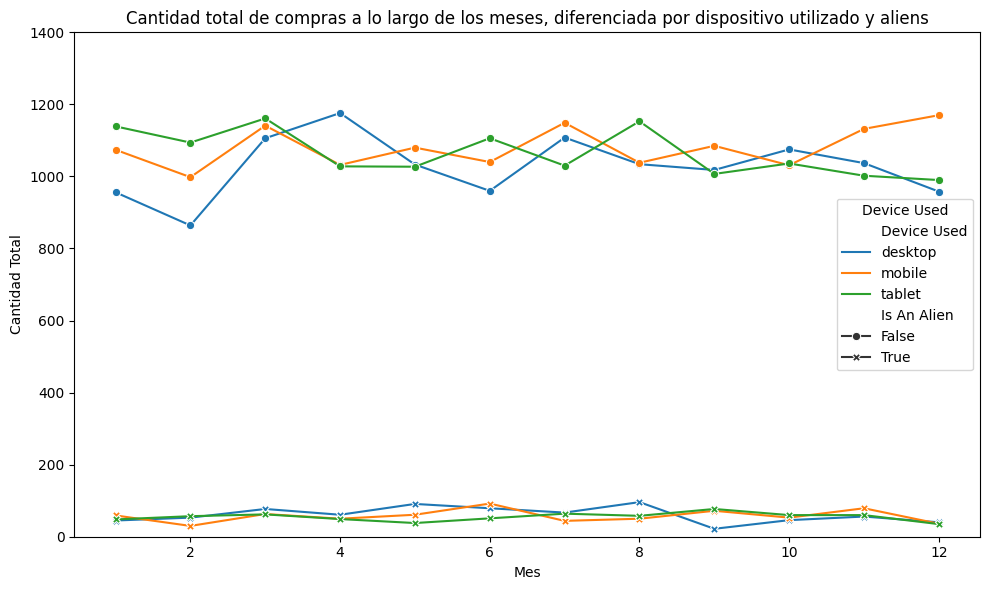

In [27]:
import seaborn as sns

#Grafico 1

# Agrupar los datos por 'Transaction Month', 'Device Used' y 'Is An Alien', y sumar 'Transaction Amount'
df_grouped = df_pandas.groupby(['Transaction Month', 'Device Used', 'Is An Alien'], as_index=False)['Quantity'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Crear el lineplot categorizado por 'Device Used' y diferenciado por 'Is An Alien'
sns.lineplot(
    data=df_grouped,
    x='Transaction Month',
    y='Quantity',
    hue='Device Used',   # Diferenciar por dispositivo
    style='Is An Alien', # Diferenciar por si es alien o no
    markers=True,        # para que cada categoría tenga un marcador diferente
    dashes=False         # para que las líneas no tengan guiones
)

# Títulos y etiquetas
plt.title('Cantidad total de compras a lo largo de los meses, diferenciada por dispositivo utilizado y aliens')
plt.xlabel('Mes')
plt.ylabel('Cantidad Total')

# Ajustar los límites del eje y (opcional)
plt.ylim(0, 1400)  # Limitar el eje y entre 0 y el valor máximo de la suma por mes

# Mostramos la leyenda
plt.legend(title='Device Used')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el gráfico anterior se muestra la cantidad total de transacciones hechas por mes del año, diferenciada por medio usado y por si es Aliens o Humano (False).
Del gráfico se observa que las transacciones totales por mes son mucho mayor en Humanos que en Aliens. Tambien se ve que en los últimos meses (11 y 12) los humanos usaron más un celular para hacer la transacción. En el mes 2 es cuando los humanos  hacen menos transacciones por Pc de escritorio.  En los últimos meses, Aliens usaron de manera similar los medios para hacer la transacción. Se diferencian más en el mes 5 y 8, donde ALiens usan más el Pc de escritorio.

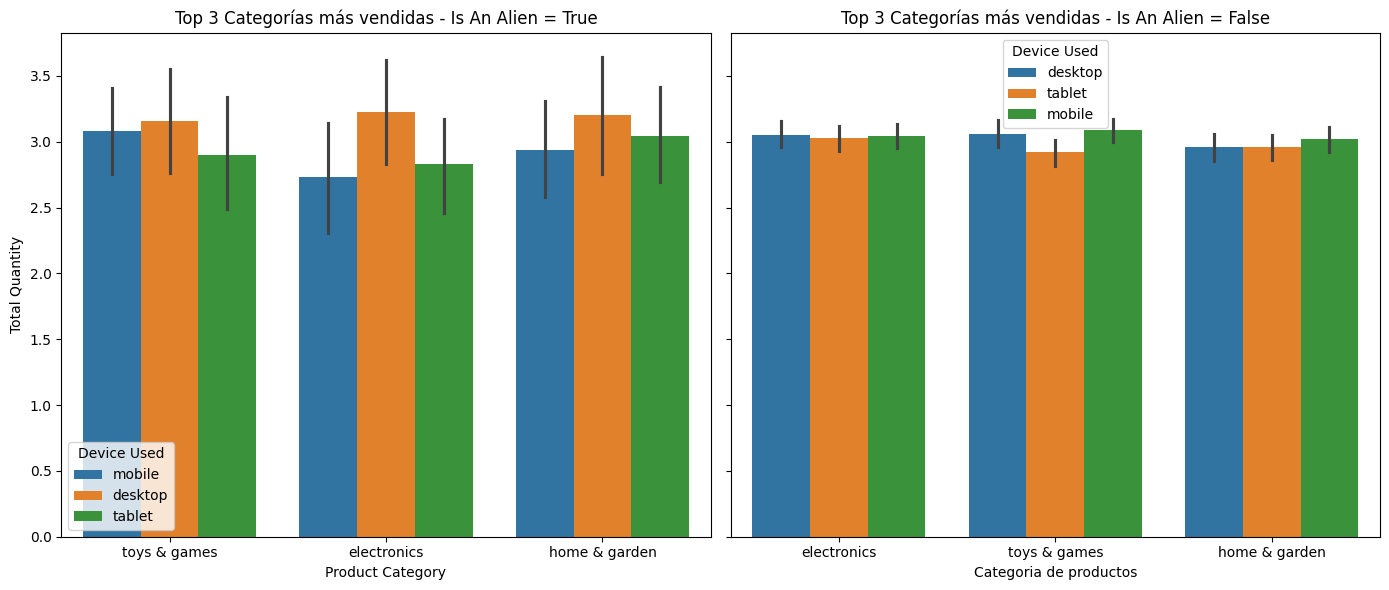

In [28]:
#Gráfico 2

# Paso 1: Filtrar las tres categorías más vendidas para 'Is An Alien = True'
top_3_alien_true = df_pandas[df_pandas['Is An Alien'] == True].groupby('Product Category')['Quantity'].sum().nlargest(3).index

# Filtrar el DataFrame para esas categorías
df_top_alien_true = df_pandas[(df_pandas['Is An Alien'] == True) & (df_pandas['Product Category'].isin(top_3_alien_true))]

# Paso 2: Filtrar las tres categorías más vendidas para 'Is An Alien = False'
top_3_alien_false = df_pandas[df_pandas['Is An Alien'] == False].groupby('Product Category')['Quantity'].sum().nlargest(3).index

# Filtrar el DataFrame para esas categorías
df_top_alien_false = df_pandas[(df_pandas['Is An Alien'] == False) & (df_pandas['Product Category'].isin(top_3_alien_false))]

# Crear el espacio para dos gráficos en paralelo
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Paso 3: Barplot para Is_An_Alien = True (tres categorías más vendidas)
sns.barplot(
    data=df_top_alien_true,
    x='Product Category',
    y='Quantity',
    hue='Device Used',
    ax=axes[0]
)
axes[0].set_title('Top 3 Categorías más vendidas - Is An Alien = True')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Total Quantity')

# Paso 4: Barplot para Is_An_Alien = False (tres categorías más vendidas)
sns.barplot(
    data=df_top_alien_false,
    x='Product Category',
    y='Quantity',
    hue='Device Used',
    ax=axes[1]
)
axes[1].set_title('Top 3 Categorías más vendidas - Is An Alien = False')
axes[1].set_xlabel('Categoria de productos')
axes[1].set_ylabel('Cantidad total')

# Ajustar el layout para que los gráficos no se sobrepongan
plt.tight_layout()
plt.show()

El gráfico anterior muestra las 3 categorias de productos más vendida y el medio usado para comprar, separado en Aliens (izquierda) y Humanos (derecha). Del gráfico se puede mencionar los siguientes puntos:
1. Las categorias eran 5 ('electronics' 'health & beauty' 'clothing' 'toys & games' 'home & garden') y se ve que en ambos grupos las tres categorias más vendidas coinciden, es decir 'toys & games' 'home & garden' y 'electronics'.
2. Dado lo anterior, las categorias menos vendidas tanto en Aliens como en Humanos es 'health & beauty' y 'clothing'.
3.Las barras negras muestran mayor variabilidad en el grupo de Aliens que en Humanos (Is An Aliens False).

In [29]:
valores_unicos = df_pandas['Product Category'].unique()
print(valores_unicos)

['electronics' 'health & beauty' 'clothing' 'toys & games' 'home & garden']


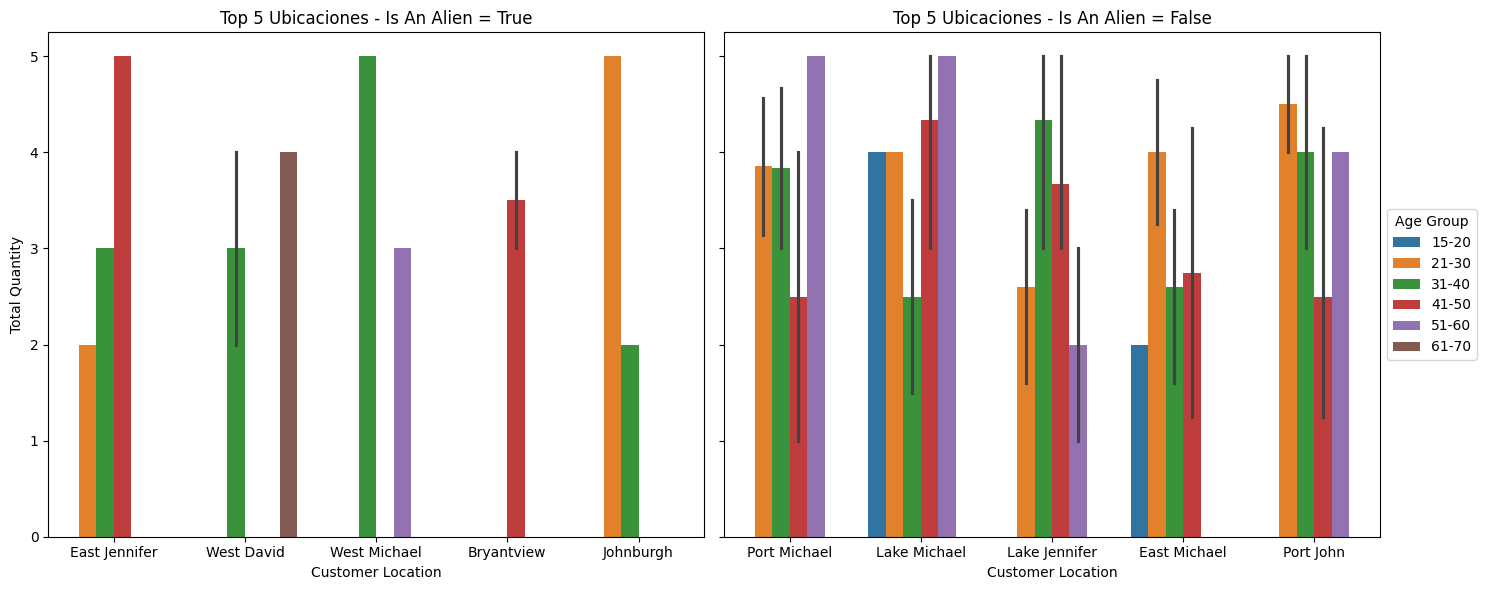

In [30]:
#Gráfico 3

# Se crea una copia, para no modificar el df original
df_copy = df_pandas.copy()

# Paso 1: Crear rangos de edad utilizando pd.cut en la copia del DataFrame
bins = [15, 20, 30, 40, 50, 60, 70]
labels = ['15-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df_copy['Age Group'] = pd.cut(df_copy['Customer Age'], bins=bins, labels=labels, right=False)

# Paso 2: Agrupar y obtener las 5 ubicaciones con más ventas para 'Is An Alien = True'
top_5_locations_alien_true = df_copy[df_copy['Is An Alien'] == True].groupby('Customer Location')['Quantity'].sum().nlargest(5).index

# Filtrar el DataFrame copiado para esas ubicaciones
df_top_locations_alien_true = df_copy[(df_copy['Is An Alien'] == True) & (df_copy['Customer Location'].isin(top_5_locations_alien_true))]

# Paso 3: Agrupar y obtener las 5 ubicaciones con más ventas para 'Is An Alien = False'
top_5_locations_alien_false = df_copy[df_copy['Is An Alien'] == False].groupby('Customer Location')['Quantity'].sum().nlargest(5).index

# Filtrar el DataFrame copiado para esas ubicaciones
df_top_locations_alien_false = df_copy[(df_copy['Is An Alien'] == False) & (df_copy['Customer Location'].isin(top_5_locations_alien_false))]

# Paso 4: Ordenar las ubicaciones según la cantidad total de ventas
order_true = df_top_locations_alien_true.groupby('Customer Location')['Quantity'].sum().sort_values(ascending=False).index
order_false = df_top_locations_alien_false.groupby('Customer Location')['Quantity'].sum().sort_values(ascending=False).index

# Crear el espacio para dos gráficos en paralelo
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Paso 5: Barplot para Is_An_Alien = True, clasificado por grupos de edad y ordenado
sns.barplot(
    data=df_top_locations_alien_true,
    x='Customer Location',
    y='Quantity',
    hue='Age Group',
    order=order_true,  # Ordenar las barras
    ax=axes[0],
    legend=False  # Sin leyenda en el gráfico de la izquierda
)
axes[0].set_title('Top 5 Ubicaciones - Is An Alien = True')
axes[0].set_xlabel('Customer Location')
axes[0].set_ylabel('Total Quantity')

# Paso 6: Barplot para Is_An_Alien = False, clasificado por grupos de edad y ordenado
barplot_right = sns.barplot(
    data=df_top_locations_alien_false,
    x='Customer Location',
    y='Quantity',
    hue='Age Group',
    order=order_false,  # Ordenar las barras
    ax=axes[1]
)
axes[1].set_title('Top 5 Ubicaciones - Is An Alien = False')
axes[1].set_xlabel('Customer Location')
axes[1].set_ylabel('Total Quantity')

# Ajustar el layout para que los gráficos no se sobrepongan
plt.tight_layout()

# Paso 7: Mover la leyenda del gráfico de la derecha fuera del gráfico
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title='Age Group', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Con respecto al gráfico anterior, se observa lo siguiente:
1. Las 5 localidades con más consumo no calzan entre Aliens y Humanos.
2.  El otro punto destacable es que en Humanos se ve más variabilidad en los rangos de edades de consumo entre las distintas ubicaciones, en cambio en Aliens, hay algunas localidades con solo tienen 1 o 2 rangos de edad.
3. Solo en el grupo Aliens hay personas en el rango entre 61 a 70 años y los menores consumidores son entre 21 a 30 años en las 5 localidades con más consumo.
4. La localidad que presenta mayor variabilidad etaria es Lake Michael en los Humanos, con rangos de edad entre 15 a 60 años, mientras que en Aliens, la ubicación con mayor variabilidad etaria es East Jennifer, con rangos entre 21 a 50 años.


### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [31]:
# 1.
spark = SparkSession.builder.appName("Create Partitioned Table").getOrCreate()

# Convertir el DataFrame de Pandas a PySpark
df_spark = spark.createDataFrame(df_pandas)

# Crear una vista temporal para poder usar SQL en PySpark
df_spark.createOrReplaceTempView("transactions_table")

# Guardar los datos como una tabla particionada por Transaction Month
df_spark.write.partitionBy("Transaction Month").mode("overwrite").format("parquet").saveAsTable("partitioned_transactions_table")

# Comprobar si la tabla ha sido creada
spark.sql("SHOW PARTITIONS partitioned_transactions_table").show()

+--------------------+
|           partition|
+--------------------+
| Transaction Month=1|
|Transaction Month=10|
|Transaction Month=11|
|Transaction Month=12|
| Transaction Month=2|
| Transaction Month=3|
| Transaction Month=4|
| Transaction Month=5|
| Transaction Month=6|
| Transaction Month=7|
| Transaction Month=8|
| Transaction Month=9|
+--------------------+



Se decidió particionar por los meses, porque tienen un rango acotado, entre 1 a 12. En una variable que usualmente se usa para analizar datos, ya que permite ver si hay comportamiento distintos a lo largo del año. Además, los datos relacionados con las transacciones suelen estar distribuidos de forma natural en el tiempo. Esta subdivisión en 12, permite gestionar mejor los datos.

In [32]:
#2
# Consulta en PySpark
top_10_customers = spark.sql("""
    SELECT `Customer ID`, SUM(Quantity) AS Total_Products
    FROM partitioned_transactions_table
    GROUP BY `Customer ID`
    ORDER BY Total_Products DESC
    LIMIT 10
""")

# Mostrar los resultados
top_10_customers.show()

+--------------------+--------------+
|         Customer ID|Total_Products|
+--------------------+--------------+
|aa8c72f5-fbcc-4bf...|             5|
|e91ebafd-1925-400...|             5|
|62b1ce0c-5495-43e...|             5|
|1718476e-0518-41b...|             5|
|2e835dd8-6c9c-4c8...|             5|
|6def79d9-fb71-415...|             5|
|447b6447-464c-400...|             5|
|866e29ec-dd8e-4a1...|             5|
|ebf10b43-2999-4fa...|             5|
|ddb1eedb-78a7-403...|             5|
+--------------------+--------------+



In [33]:
#3. Ejecutar la consulta SQL en PySpark
query = """
SELECT
    `Customer ID`,
      MAX(`Transaction Amount`) OVER (
        PARTITION BY `Customer ID`
        ORDER BY `Transaction Date`
        RANGE BETWEEN INTERVAL 3 MONTH PRECEDING AND CURRENT ROW
    ) AS Max_Amount_Last_3_Months
FROM partitioned_transactions_table
ORDER BY `Customer ID`, `Transaction Date`
"""

# Ejecutar la consulta y obtener el resultado
result = spark.sql(query)

# Mostrar los resultados
result.show()

+--------------------+------------------------+
|         Customer ID|Max_Amount_Last_3_Months|
+--------------------+------------------------+
|0005f674-821d-4c4...|                  107.11|
|000695ce-4310-416...|                  689.58|
|0010bfa7-d3b5-442...|                  130.74|
|001341a1-ce95-4f6...|                  222.59|
|0013653b-9ed4-4fa...|                  749.29|
|0027a40f-9d45-422...|                   84.59|
|0028d9e7-55bf-4e6...|                  221.28|
|002a2b79-e86c-478...|                  331.93|
|0034597d-5db9-4ef...|                  221.23|
|0035807b-8ab5-4f8...|                  175.59|
|0037cc7b-fb0b-433...|                  132.98|
|003b44c7-7a97-47d...|                   82.02|
|003bddcf-270a-474...|                  289.59|
|004d6df5-5d37-4cd...|                   32.36|
|004de8d7-e274-4f3...|                   74.56|
|005599ec-2770-498...|                   40.28|
|0055c3b0-82b2-4d2...|                  384.07|
|0059b734-6741-4e3...|                  

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [34]:
# 1. Carga de objeto
import pickle
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

with open('object.pkl', 'rb') as file:
    model = pickle.load(file)

print(type(model))

--2024-09-13 00:50:12--  https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894 [application/octet-stream]
Saving to: ‘object.pkl’

object.pkl          100%[===================>]     894  --.-KB/s    in 0s      

2024-09-13 00:50:13 (331 MB/s) - ‘object.pkl’ saved [894/894]

<class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [35]:
# 2. Exploración de objeto
# Primero revisamos los métodos disponibles para el objeto cargado 'object'
dir(model)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_

In [36]:
# Luego vemos los métodos que tienen que ver con predicción
help(model.predict)
print('=======================================================================')
help(model.predict_log_proba)
print('=======================================================================')
help(model.predict_proba)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict class labels for samples in X.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data matrix for which we want to get the predictions.
    
    Returns
    -------
    y_pred : ndarray of shape (n_samples,)
        Vector containing the class labels for each sample.

Help on method predict_log_proba in module sklearn.linear_model._logistic:

predict_log_proba(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict logarithm of probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Vector to be scored, where `n_samples` is the number of samples and
        `n_features` is the number of features

In [37]:
# 3. Creación de función personalizada para probabilidad de fraude
def prediccion(col1, col2, col3, col4):
    '''
    Define la probabilidad de fraude en base a los datos presentes en 4 columnas
    de un DataFrame proveniente de Spark.

    Parámetros:
        col1 (): columna 1 de un DataFrame de Spark
        col2 (): columna 2 de un DataFrame de Spark
        col3 (): columna 3 de un DataFrame de Spark
        col4 (): columna 4 de un DataFrame de Spark

    Retorna:
        Probabilidad de fraude
    '''
    columnas = [[col1, col2, col3, col4]]
    prob_fraude = model.predict_proba(columnas)[0][1]

    return float(prob_fraude)

In [38]:
# 4. Definición de función UDF
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

udf_function = udf(prediccion, FloatType())

In [39]:
# 5. Generación de nueva columna
new_df = df.withColumn("prediction", udf_function(df["Transaction Amount"], df["Quantity"], df["Customer Age"], df["Transaction Hour"]))

new_df.show()

+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+------------+
|      Transaction ID|         Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|  prediction|
+--------------------+--------------------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+---------

Los beneficios de usar UDF pueden resumirse principalmente en 3 puntos:

1. Permiten una ejecución en paralelo de las diferentes tareas a realizar, distribuyendo los datos en diferentes nodos.
2. Como PySpark es una interfaz en Python de Apache Spark, no todas las funciones "obvias" de Python van a funcionar bien con los objetos que se creen desde acá, por lo que la UDF ayuda a hacer una especie de traducción de funciones desde Python a Spark.
3. Permite la aplicación de modelos que vienen fuera de Spark para trabajar directamente los datos.

In [41]:
# No olvidar cerrar las sesiones
spark.stop()
sparksession.stop()